## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

## 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
> num_neurons = [512, 256, 128] -> [512, 256, 128, 64]   

In [5]:
from keras.layers import Dropout

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64], drp_ratio=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

## 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
> drp_ratio = 0.2 -> [0.5, 0.25, 0.1]   

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.5, 0.25, 0.1]

##  將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果
> SGD --> Adam

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for dropout in Dropout_EXP :
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("=====> drop out:", dropout)
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=dropout)
    model.summary()
    
    #optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
        epochs=EPOCHS, 
        batch_size=BATCH_SIZE, 
        validation_data=(x_test, y_test), 
        shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    
    name_tag_of_dropout = 'drop_rate_%.2f' % dropout
    results[name_tag_of_dropout] = {
            'train_loss': train_loss,
            'valid_loss': valid_loss,
            'train_acc' : train_acc,
            'valid_acc' : valid_acc}

=====> drop out: 0.5
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 12

50000/50000 [==============================] - 2s 34us/step - loss: 2.0450 - accuracy: 0.2153 - val_loss: 2.0835 - val_accuracy: 0.2282
Epoch 45/50
50000/50000 [==============================] - 2s 34us/step - loss: 2.0488 - accuracy: 0.2151 - val_loss: 2.1118 - val_accuracy: 0.2076
Epoch 46/50
50000/50000 [==============================] - 2s 33us/step - loss: 2.0435 - accuracy: 0.2161 - val_loss: 2.1059 - val_accuracy: 0.2171
Epoch 47/50
50000/50000 [==============================] - 2s 34us/step - loss: 2.0435 - accuracy: 0.2168 - val_loss: 2.1362 - val_accuracy: 0.2047
Epoch 48/50
50000/50000 [==============================] - 2s 34us/step - loss: 2.0437 - accuracy: 0.2163 - val_loss: 2.0989 - val_accuracy: 0.2052
Epoch 49/50
50000/50000 [==============================] - 2s 34us/step - loss: 2.0400 - accuracy: 0.2178 - val_loss: 2.0885 - val_accuracy: 0.2214
Epoch 50/50
50000/50000 [==============================] - 2s 34us/step - loss: 2.0404 - accuracy: 0.2181 - val_loss: 2.0916

Epoch 38/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.5991 - accuracy: 0.4244 - val_loss: 1.5179 - val_accuracy: 0.4634
Epoch 39/50
50000/50000 [==============================] - 2s 34us/step - loss: 1.5891 - accuracy: 0.4312 - val_loss: 1.5167 - val_accuracy: 0.4654
Epoch 40/50
50000/50000 [==============================] - 2s 33us/step - loss: 1.5983 - accuracy: 0.4260 - val_loss: 1.5421 - val_accuracy: 0.4587
Epoch 41/50
50000/50000 [==============================] - 2s 34us/step - loss: 1.5951 - accuracy: 0.4272 - val_loss: 1.5451 - val_accuracy: 0.4519
Epoch 42/50
50000/50000 [==============================] - 2s 34us/step - loss: 1.5954 - accuracy: 0.4248 - val_loss: 1.5664 - val_accuracy: 0.4508
Epoch 43/50
50000/50000 [==============================] - 2s 34us/step - loss: 1.5943 - accuracy: 0.4307 - val_loss: 1.5460 - val_accuracy: 0.4528
Epoch 44/50
50000/50000 [==============================] - 2s 34us/step - loss: 1.5990 - accuracy: 0.4277 - val_

50000/50000 [==============================] - 2s 34us/step - loss: 1.3046 - accuracy: 0.5331 - val_loss: 1.3925 - val_accuracy: 0.5076
Epoch 32/50
50000/50000 [==============================] - 2s 34us/step - loss: 1.2932 - accuracy: 0.5354 - val_loss: 1.4177 - val_accuracy: 0.5009
Epoch 33/50
50000/50000 [==============================] - 2s 34us/step - loss: 1.2908 - accuracy: 0.5373 - val_loss: 1.3681 - val_accuracy: 0.5168
Epoch 34/50
50000/50000 [==============================] - 2s 34us/step - loss: 1.2886 - accuracy: 0.5394 - val_loss: 1.3524 - val_accuracy: 0.5227
Epoch 35/50
50000/50000 [==============================] - 2s 34us/step - loss: 1.2785 - accuracy: 0.5422 - val_loss: 1.3823 - val_accuracy: 0.5100
Epoch 36/50
50000/50000 [==============================] - 2s 34us/step - loss: 1.2758 - accuracy: 0.5428 - val_loss: 1.3642 - val_accuracy: 0.5191
Epoch 37/50
50000/50000 [==============================] - 2s 34us/step - loss: 1.2664 - accuracy: 0.5435 - val_loss: 1.3561

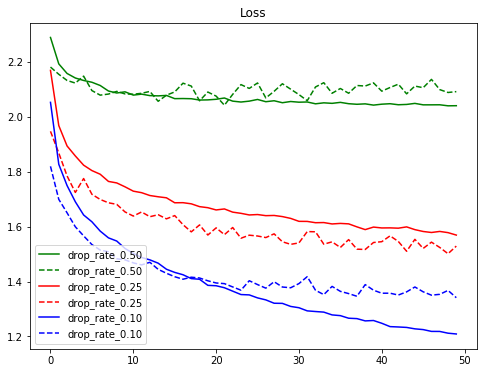

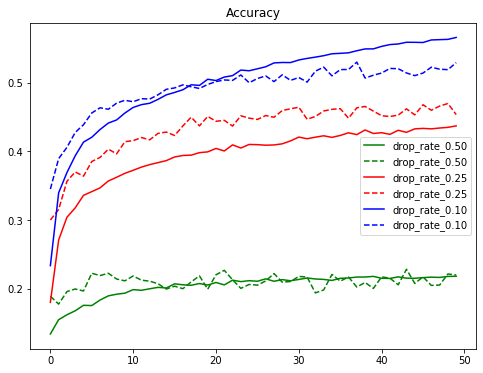

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["g", "r", "b", "orange", "pink"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])),results[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_loss'])),results[cond]['valid_loss'], '--', label=cond, color=color_bar[i])
plt.legend()
plt.title("Loss")
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])),results[cond]['train_acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_acc'])),results[cond]['valid_acc'], '--', label=cond, color=color_bar[i])
plt.legend()
plt.title("Accuracy")
plt.show()